# Importing the prerequisites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import ExcelWriter
from pandas import ExcelFile

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [6]:
df = pd.read_excel('Bank Customer Churn.xlsx')

In [10]:
df.head(15)

,userid,churn,age,rent_or_own,trivia_played,trivia_shared_results,trivia_view_unlocked,trivia_view_results,cards_share,cards_viewed,...,payfreq,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,zodiac_sign,un_linked_account,re_linked_account,cash_back_engagement,has_referred
0,0,1,22,na,0,0,0,0,0,48,...,Weekly,0,0,0,0,Taurus,0,0,0.57,0
1,7,1,25,R,0,0,5,0,0,5,...,Weekly,0,0,0,0,Gemini,0,0,0.07,0
2,8,1,32,na,0,0,0,0,0,49,...,Bi-Weekly,0,0,0,0,Virgo,0,0,0.60,1
3,18,1,26,na,0,0,169,0,0,184,...,na,0,0,0,0,Leo,0,0,1.77,1
4,19,1,28,R,0,0,11,0,0,65,...,na,0,0,0,0,Cancer,0,0,1.23,1
5,20,1,27,R,57,2,46,57,0,295,...,Semi-Monthly,0,0,0,0,Libra,0,0,1.90,0
6,25,1,26,na,0,0,1,0,0,24,...,Weekly,0,0,0,0,Gemini,0,0,0.40,1
7,26,1,28,O,5,2,0,3,0,190,...,Semi-Monthly,0,0,0,0,Aquarius,0,0,1.97,0
8,28,1,41,na,0,0,15,0,0,32,...,Bi-Weekly,0,0,0,0,Cancer,1,0,0.43,0
9,30,1,22,na,0,0,2,0,0,4,...,na,0,0,0,0,Virgo,0,0,0.00,0


In [8]:
df.keys()

Index(['userid', 'churn', 'age', 'rent_or_own', 'trivia_played',
       'trivia_shared_results', 'trivia_view_unlocked', 'trivia_view_results',
       'cards_share', 'cards_viewed', 'cards_helpful', 'cards_not_helpful',
       'cards_clicked', 'has_used_mobile', 'has_used_web', 'used_android',
       'used_ios', 'more_than_one_mobile_device', 'payfreq', 'loan_pending',
       'withdrawn_application', 'paid_off_loan', 'did_not_accept_funding',
       'zodiac_sign', 'un_linked_account', 're_linked_account',
       'cash_back_engagement', 'has_referred'],
      dtype='object')

There are 28 columns in total. So, we have to check the dependance with each column W.R.T the 'churn' column.

# Terms in the dataset

1. userid : unique values
2. churn : churn, is the rate at which customers stop doing business with an entity(0 : not left & 1 : left the bank)
3. age : age of the customer
4. rent_or_own : do the customer rent's or owns a place
5. [trivia_played, trivia_shared_results,trivia_view_unlocked,trivia_view_results,cards_share,cards_viewed, cards_helpful, cards_not_helpful,cards_clicked] : I DON'T KNOW.
6. has_used_mobile : whether the customer has used mobile or not.
7. has_used_web : whether customer has used internet banking or not.
8. used_android : whether the user is using an android device or not.
9. used_ios : whether the user is using an IOS device or not.
10. more_than_one_mobile_device : if the user has more than one mobile phone.
11. payfreq : payment frequency of the particular user.
12. loan_pending : whether the user's loan is pending or not.
13. zodiac_sign : sun signs of the users.
14. un_linked_account : whether they have linked accounts or not.
15. withdrawn_application : whether they have taken back the application or not.
16. paid_off_loan : did they pay the loan or not.
17. did_not_accept_funding : self explanatory.
18. re_linked_account : re-linked or not.
19. cash_back_engagement : IDK
20. has_referred : did they refer somebody or not.



TOTAL 8 COLUMNS ARE A LITTLE UNCLEAR.

# Let's start the EDA

In [11]:
df.describe()

,userid,churn,age,trivia_played,trivia_shared_results,trivia_view_unlocked,trivia_view_results,cards_share,cards_viewed,cards_helpful,...,used_ios,more_than_one_mobile_device,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,un_linked_account,re_linked_account,cash_back_engagement,has_referred
count,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,...,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000
mean,35215.401714,0.412696,32.123588,3.307432,0.297261,28.090642,3.241020,0.076146,93.159903,0.059236,...,0.589426,0.420995,0.001310,0.019114,0.019094,0.004867,0.174629,0.018490,0.912191,0.316521
std,20152.252133,0.492324,9.886886,9.020670,0.993589,41.905861,8.860041,0.471277,88.887982,1.365405,...,0.491943,0.914631,0.036175,0.136928,0.136855,0.069595,0.379654,0.134718,0.748151,0.465123
min,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17810.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000
50%,35473.000000,0.000000,30.000000,0.000000,0.000000,9.000000,0.000000,0.000000,66.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000
75%,52787.000000,1.000000,37.000000,1.000000,0.000000,43.000000,1.000000,0.000000,163.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.530000,1.000000
max,69659.000000,1.000000,99.000000,72.000000,28.000000,1067.000000,61.000000,29.000000,598.000000,119.000000,...,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48079 entries, 0 to 48078
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   userid                       48079 non-null  int64  
 1   churn                        48079 non-null  int64  
 2   age                          48079 non-null  int64  
 3   rent_or_own                  48079 non-null  object 
 4   trivia_played                48079 non-null  int64  
 5   trivia_shared_results        48079 non-null  int64  
 6   trivia_view_unlocked         48079 non-null  int64  
 7   trivia_view_results          48079 non-null  int64  
 8   cards_share                  48079 non-null  int64  
 9   cards_viewed                 48079 non-null  int64  
 10  cards_helpful                48079 non-null  int64  
 11  cards_not_helpful            48079 non-null  int64  
 12  cards_clicked                48079 non-null  int64  
 13  has_used_mobile 

In [14]:
df.isnull().sum()

userid                         0
churn                          0
age                            0
rent_or_own                    0
trivia_played                  0
trivia_shared_results          0
trivia_view_unlocked           0
trivia_view_results            0
cards_share                    0
cards_viewed                   0
cards_helpful                  0
cards_not_helpful              0
cards_clicked                  0
has_used_mobile                0
has_used_web                   0
used_android                   0
used_ios                       0
more_than_one_mobile_device    0
payfreq                        0
loan_pending                   0
withdrawn_application          0
paid_off_loan                  0
did_not_accept_funding         0
zodiac_sign                    0
un_linked_account              0
re_linked_account              0
cash_back_engagement           0
has_referred                   0
dtype: int64

It seems there are no null values as of now. But there are many "na" values which we shall take care later.

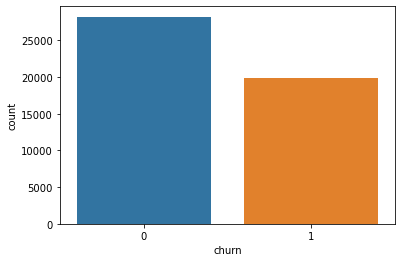

In [15]:
sns.countplot(x='churn',data=df)

In [26]:
sns.countplot(x='churn',hue='age'.,data=df)

TypeError: must be str, not int